In [8]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.utils import shuffle
from keras.preprocessing import image
import tensorflow as tf
from PIL import Image
from sklearn.metrics import accuracy_score
import re
import random
import src.models as md

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from tensorflow.keras.preprocessing import image

Image path: new_garbage_classification\cardboard\cardboard793.jpg


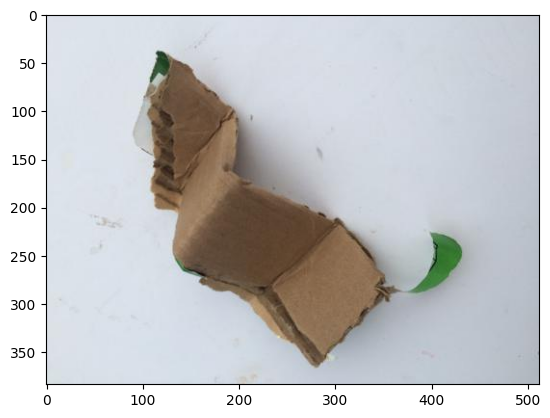

In [11]:
verfication=md.display_random_image("new_garbage_classification")

In [4]:
def display_random_image(data_directory):
    subfolders = os.listdir(data_directory)
    random_subfolder = random.choice(subfolders)
    subfolder_path = os.path.join(data_directory, random_subfolder)

    random_file = random.choice(os.listdir(subfolder_path))

    image_path = os.path.join(subfolder_path, random_file)
    random_image = Image.open(image_path)
    print('Image path:', image_path)
    
    plt.imshow(random_image)
    plt.show()

In [9]:
garbage_types_labels={'battery': 0, 'biological': 1, 'brown-glass': 2, 'cardboard': 3, 'green-glass': 4, 'metal': 5, 'paper': 6, 'plastic': 7, 'trash': 8, 'white-glass': 9}

Hereby we are going to create a dataframe with with each photo:
- We create a list (filenames_list) with all the filenames in the dataset.
- We create a list to store the corresponding category (categories_list). To take into account that each folder of the dataset has one class of data
- We do a for loop with all the files on the folders to loop each element of the dictionary with all our garbage types. The loop obtains the name slist of each file and store them in (filenames). The same for categories (categories_list) storages the list of categories as much of times that the categories is present in the files.
- Then, we create the df wit two columns 'Image'and'Garbage_category'.
- Finally, we create a fx (def file_rename) to create a prefix to each file. This will help us in the next steps to model and analyse each file.

In [ ]:
def file_rename(df, col_name):
    df[col_name] = df[col_name].astype(str).apply(lambda x: x[:re.search("\d", str(x)).start()] + '/' + str(x))
    return df

In [ ]:
def create_dataframe(data_directory, garbage_types_labels):
    image_list = []
    categories_list = []

    for category, category_code in garbage_types_labels.items():
        category_path = os.path.join(data_directory, category)
        images = os.listdir(category_path)
        image_list += images
        categories_list += [category_code] * len(images)

    df = pd.DataFrame({'Image': image_list, 'Category': categories_list})
    return df

In [ ]:

data_directory = "new_garbage_classification/"
image_list = []
categories_list = []

for category, category_code in garbage_types_labels.items():
    category_path = os.path.join(data_directory, category)
    images = os.listdir(category_path)
    image_list += images
    categories_list += [category_code] * len(images)

df = pd.DataFrame({'Image': image_list, 'Category': categories_list})
df = file_rename(df, 'Image')
df

In [10]:
def file_rename(df, col_name):
    df[col_name] = df[col_name].astype(str).apply(lambda x: x[:re.search("\d", str(x)).start()] + '/' + str(x))
    return df


,Image,Category
0,battery/battery1.jpg,0
1,battery/battery10.jpg,0
2,battery/battery100.jpg,0
3,battery/battery101.jpg,0
4,battery/battery102.jpg,0
...,...,...
8208,white-glass/white-glass95.jpg,9
8209,white-glass/white-glass96.jpg,9
8210,white-glass/white-glass97.jpg,9
8211,white-glass/white-glass98.jpg,9


In [15]:
unique_values = df['Category'].unique()
print(unique_values)

[0 1 2 3 4 5 6 7 8 9]


biological/biological837.jpg


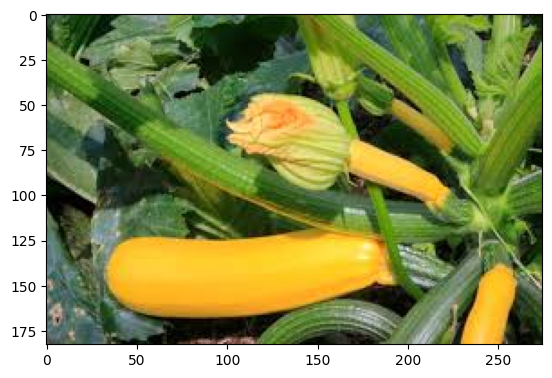

In [16]:
random_row = random.randint(0, len(df)-1)
sample = df.iloc[random_row]
randomimage = image.load_img(data_directory +sample['Image'])
print(sample['Image'])
plt.imshow(randomimage)

In [17]:
duplicates_exist = df.duplicated().any()
print(duplicates_exist)

False


In [18]:
nulls=df.isnull().any()
print(nulls)

Image       False
Category    False
dtype: bool


In [19]:
df.to_csv('datasets/df_f_new.csv', index=False)